<a href="https://colab.research.google.com/github/jfcaro/Calidad-de-Aire---Comunidad-Valenciana/blob/master/Calidad_Aire_Comunidad_Valenciana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calidad del Aire en Comunidad Valenciana

Análisis Calidad de Aire en Comunidad Valenciana (2020)

fuente: https://bit.ly/3duKiXL

@jfrcaro

In [0]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Descargar los datos 

lecturas ={}
Estaciones={"El Pla":"http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140062020.txt",
            "Florida Babel": "http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140082020.txt",
            "Rabassa": "http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140092020.txt",
            "AP_D_Pesquera":"http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140142020.txt",
            "AP_ISM": "http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140122020.txt",
            "AP_T_Frutero":"http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140132020.txt",
            "Parc_Mar_Prov": "http://www.cma.gva.es/cidam/emedio/descargar.asp?fichero=2020/mh/MHEST030140102020.txt"}
            
for estacion in Estaciones:
  print (estacion)
  lecturas[estacion] =pd.read_csv(Estaciones[estacion], sep ='\t', encoding='ISO-8859-1',skiprows=[0,1,2,4], decimal=',')
  lecturas[estacion]['FECHA'] =pd.to_datetime(lecturas[estacion]['FECHA'],format='%d/%m/%Y')
  lecturas[estacion] = lecturas[estacion].set_index('FECHA')
  lecturas[estacion]['Mes']=lecturas[estacion].index.month

El Pla
Florida Babel
Rabassa
AP_D_Pesquera
AP_ISM
AP_T_Frutero
Parc_Mar_Prov


In [10]:
medidas = []
print ("Los campos registrados en cada una de las estaciones son: \n")
for estacion in Estaciones:
  print (estacion+":")
  print (lecturas[estacion].columns.to_list())
  medidas = medidas+lecturas[estacion].columns.to_list()
  print ("\n") 
medidas = set(medidas)
medidas.discard('HORA')
medidas.discard('Mes')

Los campos registrados en cada una de las estaciones son: 

El Pla:
['HORA', 'C8H10', 'SO2', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'C7H8', 'C6H6', 'Mes']


Florida Babel:
['HORA', 'SO2', 'NO', 'NO2', 'NOx', 'O3', 'Veloc.', 'Direc.', 'Temp.', 'H.Rel.', 'R.Sol.', 'Precip.', 'Mes']


Rabassa:
['HORA', 'PM2.5', 'PM1', 'SO2', 'CO', 'NO', 'NO2', 'PM10', 'NOx', 'O3', 'Veloc.', 'Direc.', 'Temp.', 'H.Rel.', 'Pres.', 'R.Sol.', 'Precip.', 'Mes']


AP_D_Pesquera:
['HORA', 'PM10', 'Mes']


AP_ISM:
['HORA', 'PM10', 'Mes']


AP_T_Frutero:
['HORA', 'PM10', 'Mes']


Parc_Mar_Prov:
['HORA', 'Veloc.máx.', 'PM10', 'Veloc.', 'Direc.', 'Temp.', 'H.Rel.', 'Mes']




In [11]:
# Analisis dataframe
lecturas['El Pla'].describe()

,HORA,C8H10,SO2,CO,NO,NO2,NOx,O3,C7H8,C6H6,Mes
count,2174.000000,1970.000000,2174.000000,2100.000000,2174.000000,2174.000000,2174.000000,2174.000000,1970.000000,1970.000000,2174.000000
mean,11.502760,0.889949,3.832107,0.222048,11.216191,26.714351,43.557958,53.684453,2.911168,0.379340,2.000000
std,6.939005,1.185236,1.107170,0.176932,30.286790,24.931398,65.813114,30.270202,6.148394,0.261213,0.825837
min,0.000000,0.200000,3.000000,0.100000,1.000000,2.000000,4.000000,1.000000,0.200000,0.200000,1.000000
25%,5.000000,0.200000,3.000000,0.100000,2.000000,8.000000,10.000000,27.000000,0.500000,0.200000,1.000000
50%,12.000000,0.500000,4.000000,0.200000,2.000000,19.000000,21.000000,57.000000,1.500000,0.300000,2.000000
75%,18.000000,1.000000,4.000000,0.300000,4.000000,38.000000,45.000000,78.000000,3.600000,0.400000,3.000000
max,23.000000,13.900000,17.000000,1.400000,383.000000,132.000000,720.000000,119.000000,167.500000,3.000000,3.000000


In [12]:
# Primeros datos del dataframe
lecturas['El Pla'].head(5)

,HORA,C8H10,SO2,CO,NO,NO2,NOx,O3,C7H8,C6H6,Mes
FECHA,,,,,,,,,,,
2020-01-01,0,0.2,5,0.6,23,46,81,4,0.8,0.3,1
2020-01-01,1,0.4,5,0.5,22,48,82,5,1.2,0.2,1
2020-01-01,2,2.2,6,0.4,7,45,55,4,2.2,0.4,1
2020-01-01,3,1.6,4,0.1,2,26,29,18,3.3,0.3,1
2020-01-01,4,1.1,5,0.1,2,19,21,25,3.2,0.2,1


In [0]:
# Función que obtiene la media horaria de cada medida por mes

def datos (mes,magnitud,estacion):
    return lecturas[estacion][lecturas[estacion]['Mes']==mes].groupby('HORA')[magnitud].mean().to_numpy()  
    


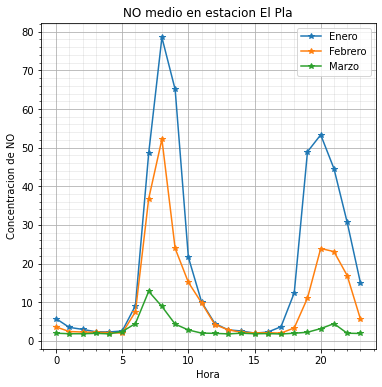

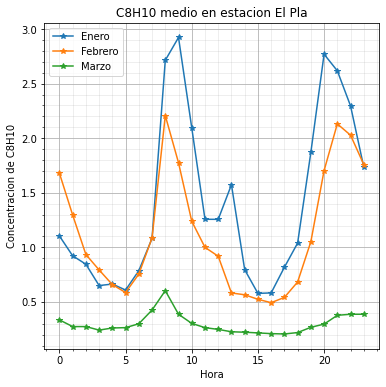

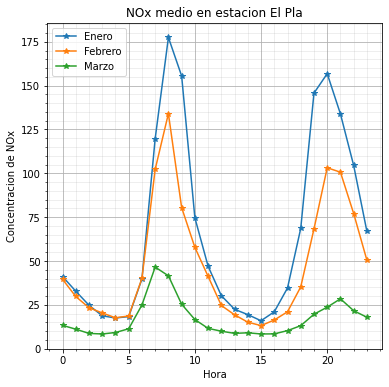

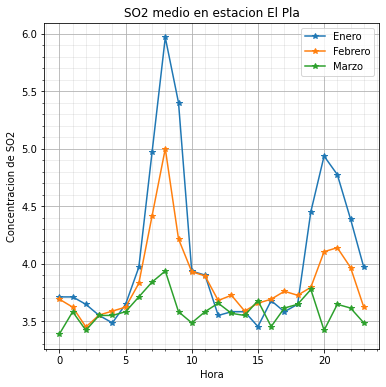

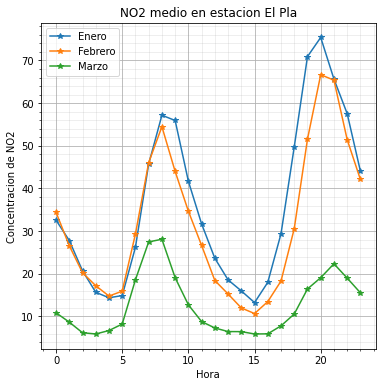

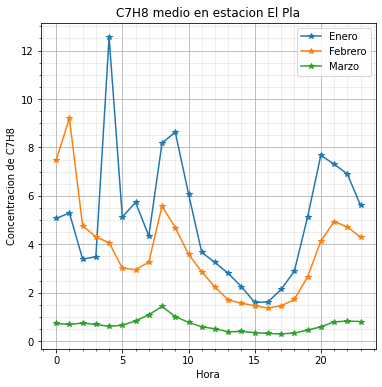

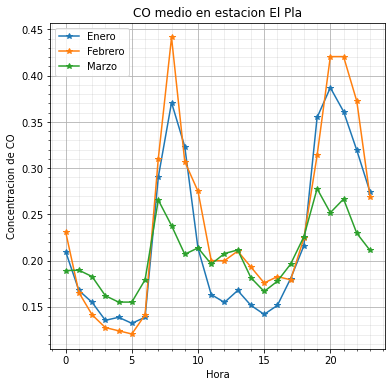

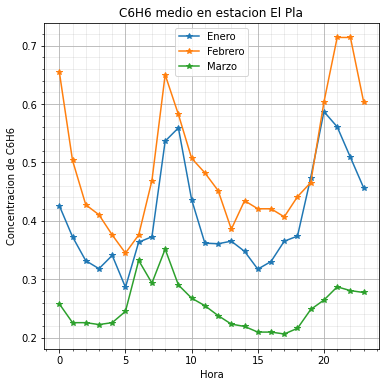

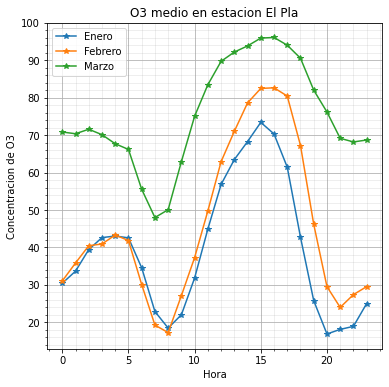

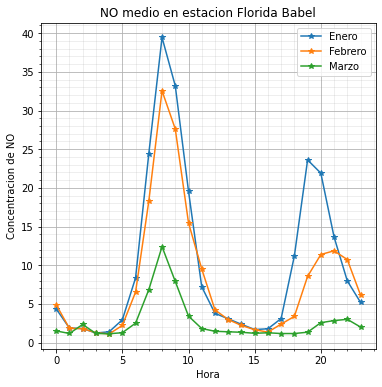

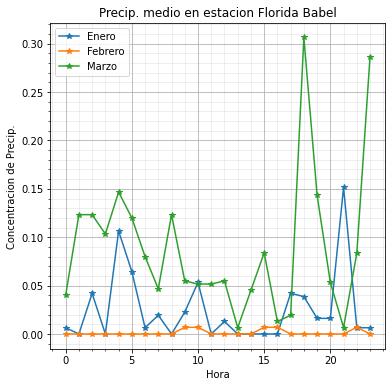

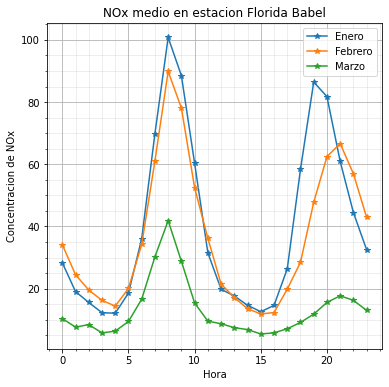

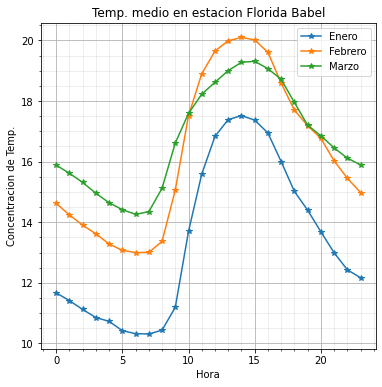

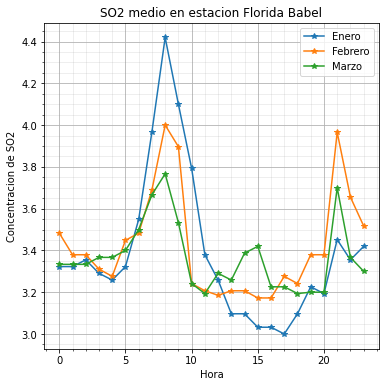

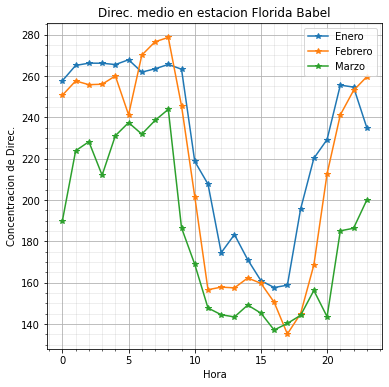

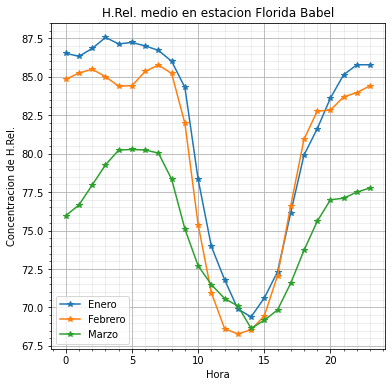

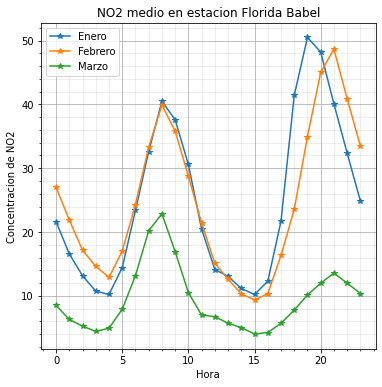

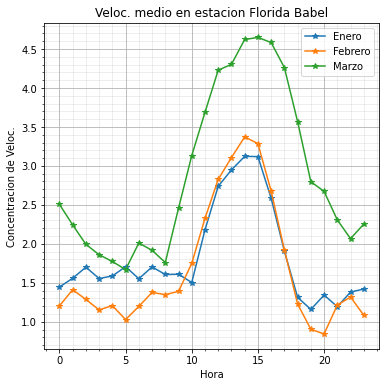

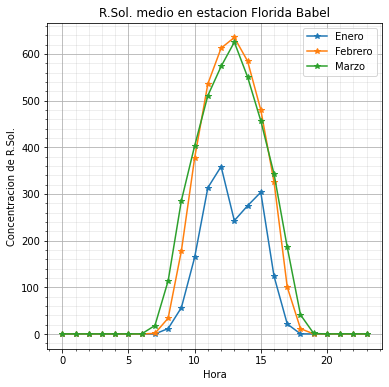

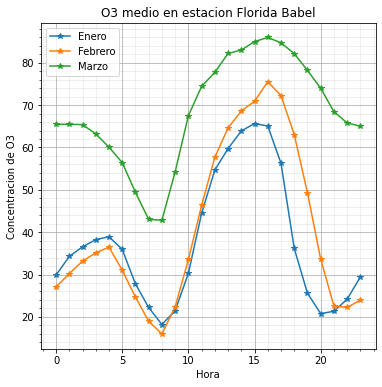

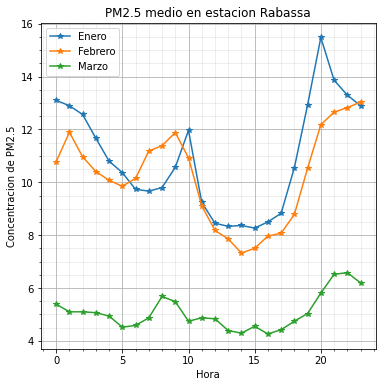

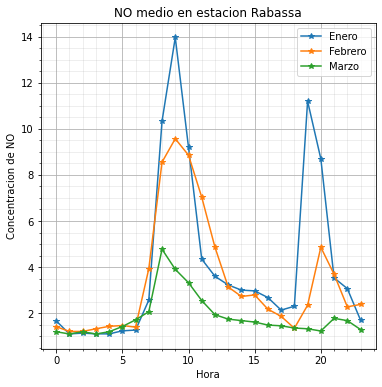

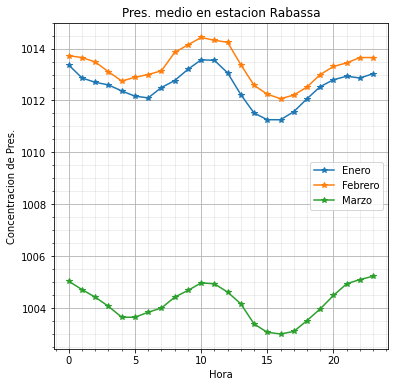

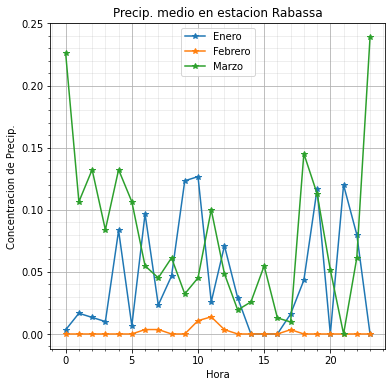

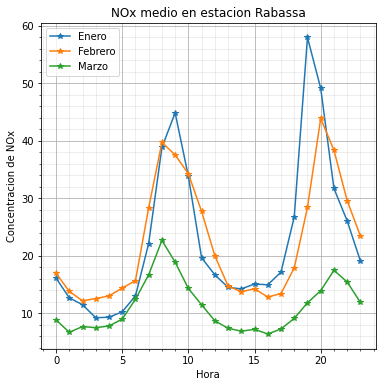

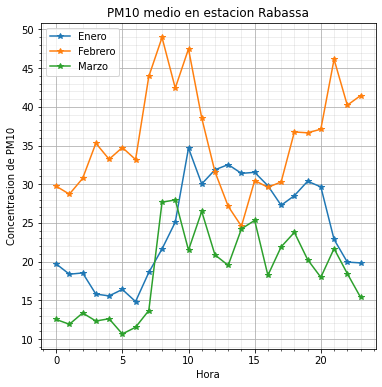

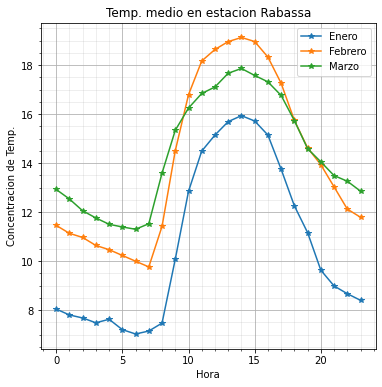

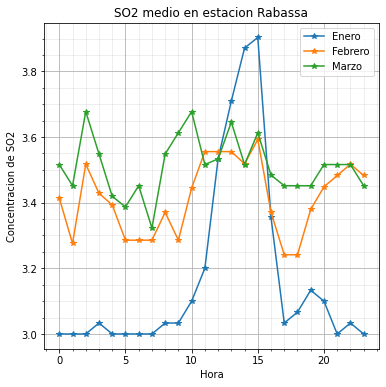

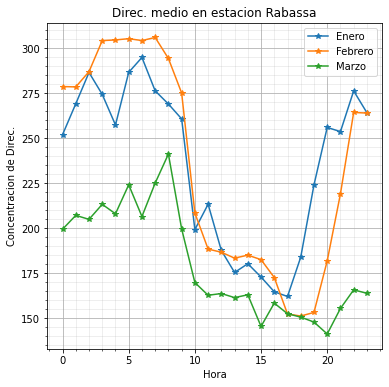

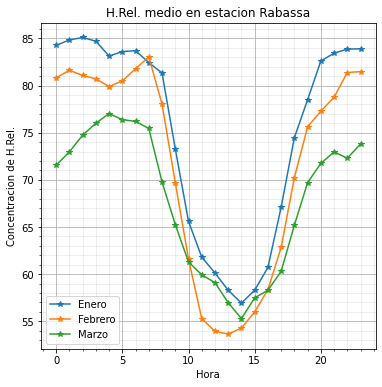

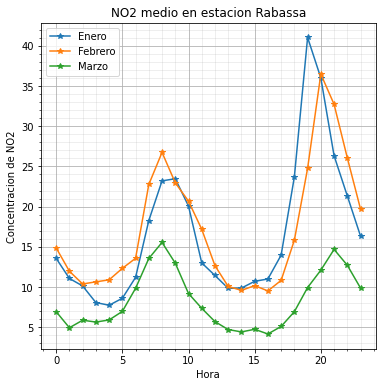

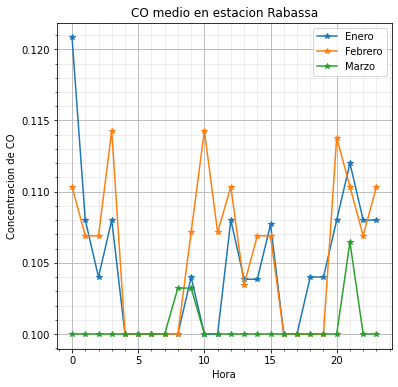

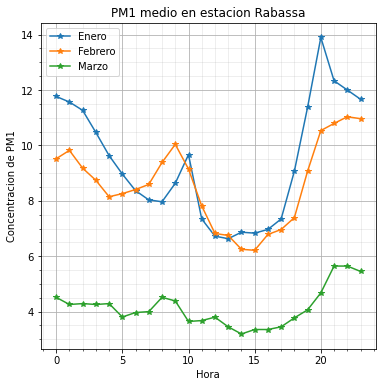

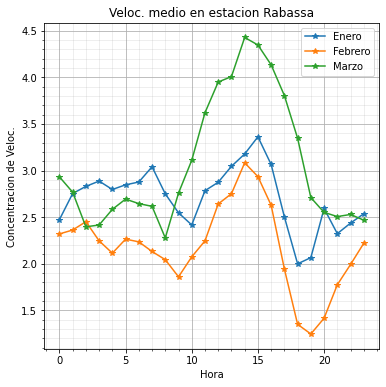

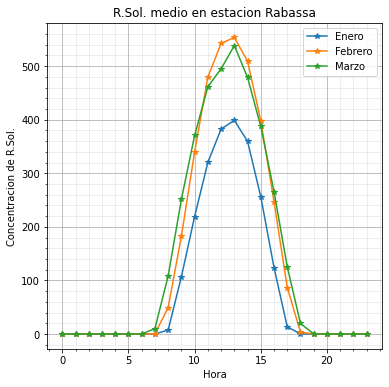

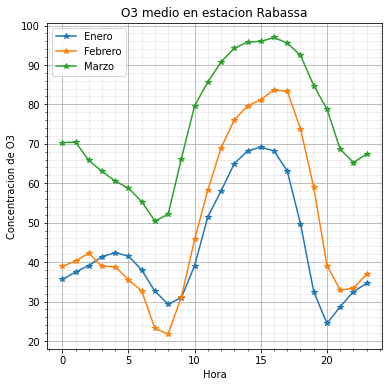

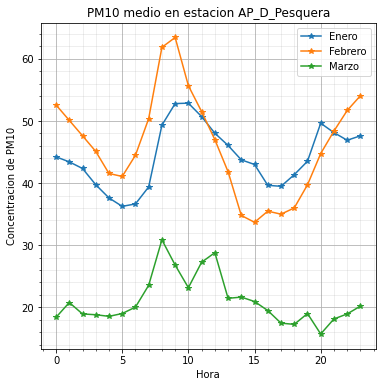

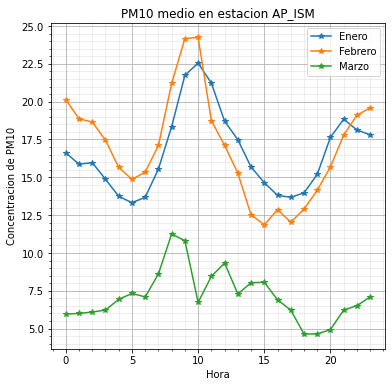

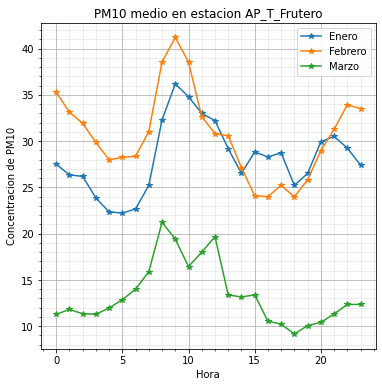

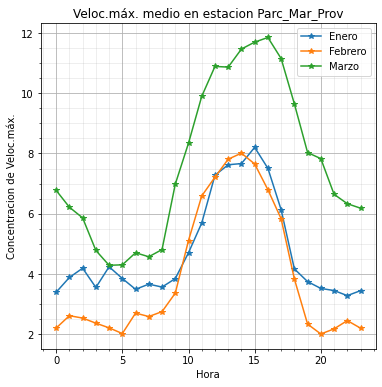

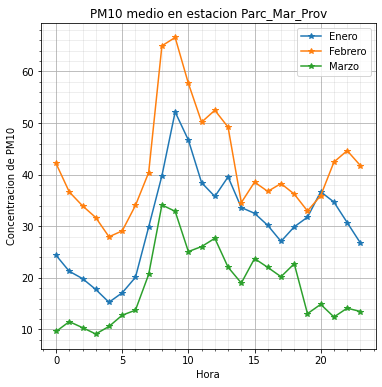

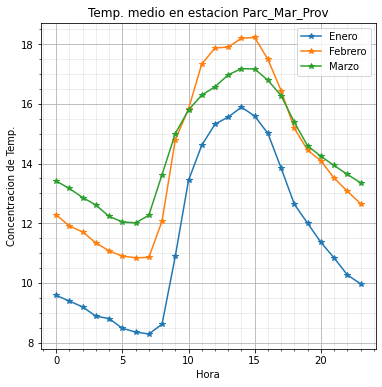

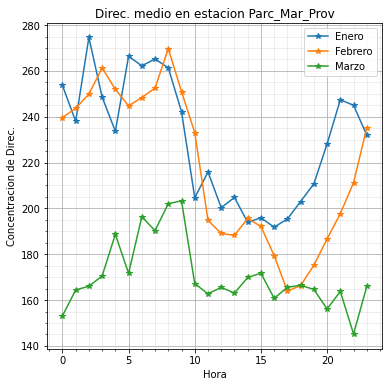

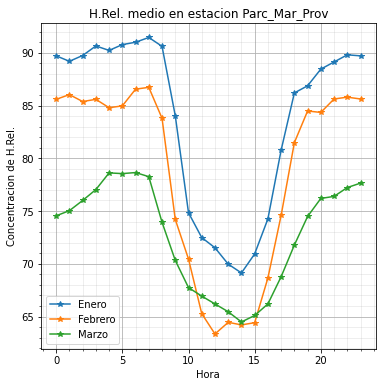

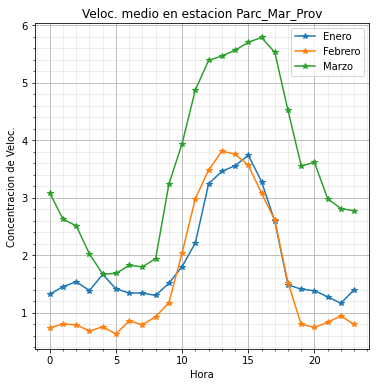

In [14]:
# Representación datos recorriendo diccionario de magnitudes y meses

#medidas =[ 'SO2', 'NO', 'NO2', 'NOx', 'O3']
nombre_mes ={1:"Enero",2:"Febrero", 3:"Marzo", 4:"Abril", 5: "Mayo", 6: "Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}
# medidas= ['PM10','NO2','NOx']

for estacion in Estaciones: 
  for medida in medidas:
    if medida in lecturas[estacion].columns.to_list(): 
      meses = lecturas[estacion]['Mes'].unique()
      plt.figure(figsize=(6,6))
      for mes in meses:   
        plt.plot(datos(mes, medida,estacion), marker ='*', label =nombre_mes[mes])        
      plt.title( medida +" medio en estacion " + estacion)
      plt.xlabel("Hora")
      plt.ylabel("Concentracion de "+ medida)
      plt.legend() 
      plt.grid(b=True, which='major')
      plt.minorticks_on()
      plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
      plt.show()
